In [14]:
#Step 1
#importing all the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from PIL import Image
import pandas as pd
import numpy as np
import random
import pickle

In [3]:
#Step 2
#loading dataset
data = pd.read_csv('car2.csv')

In [4]:
#Step 3
#features
feature_cols = ['price','body','mileage','engType','registration','year','drive']

In [5]:
#Step 4
#factorizing or converting text data or value into numeric value (int)
data['body'],_ = pd.factorize(data['body'])
data['engType'],_ = pd.factorize(data['engType'])
data['registration'],_ = pd.factorize(data['registration'])
data['drive'],_ = pd.factorize(data['drive'])

In [6]:
#Step 5
#assigning feature variables to X, and target variable to y
X = data[feature_cols]
y = data.car

In [7]:
#Step 6
#splitting up the dataset, into two parts, 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [24]:
#Step 7
#Create the instance of DecisionTreeClassifier with max_depth = None i.e till leaf node & random_state is for maintaining state
tree_clf = DecisionTreeClassifier(max_depth=None, random_state=1)
#train the classifier
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [25]:
#Step 8
#prediction
y_predict = tree_clf.predict(X_test)
print("you should buy",y_predict)

you should buy ['Toyota\tCorolla' 'Opel\tOmega' 'Volkswagen\tT5 (Transporter).' ...
 'Infiniti\tG37' 'Mitsubishi\tLancer X' 'Chery\tQQ']


In [26]:
#Step 9
# Model Accuracy, how often is the classifier correct?, Evaluate acc_test
print(accuracy_score(y_test, y_predict))

0.9906021580229725


In [23]:
#Step 10
#visualization
dot_data = export_graphviz(tree_clf, out_file = None, 
	filled = True, rounded = True,	special_characters = True, 
	feature_names = feature_cols, class_names = data['car'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('output-tree.png')
decisionTree = Image.open('output-tree.png')
decisionTree.show()

below tree is a sample tree, we could not generate the tree for this dataset as it's too big.

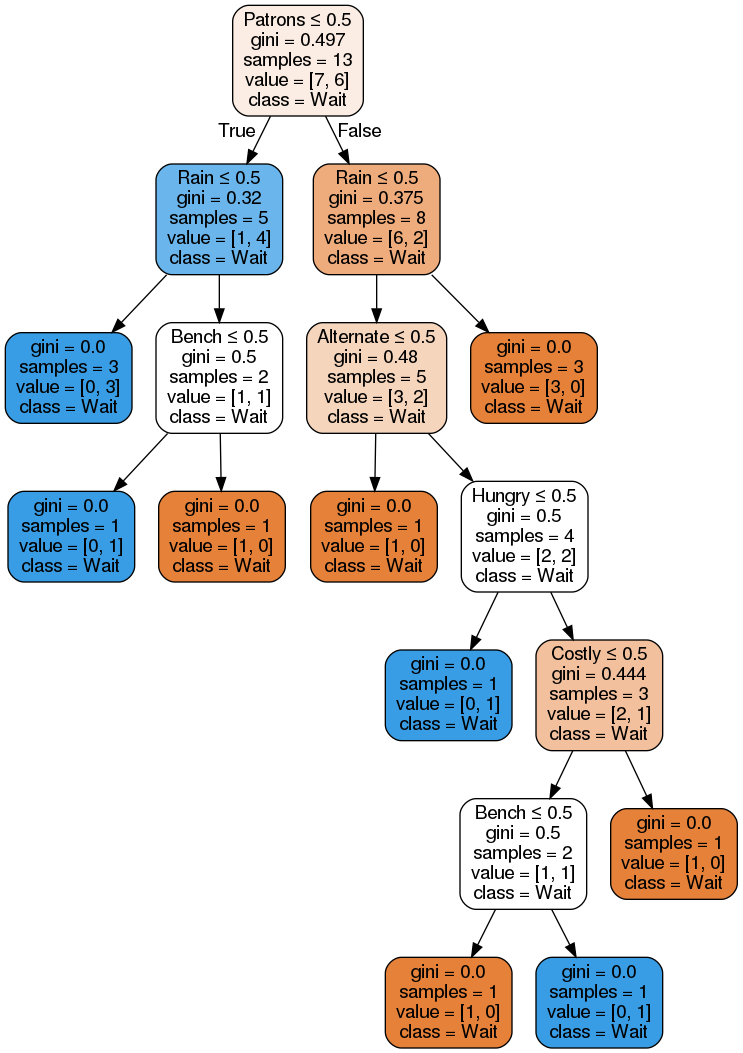

Now, we have build a decision tree classifier with car dataset, which on given details of car, 
predicts or classifies the Car, our model has 99% accuracy, and works well, at (step 10) we have generated the
tree with the help of graphviv, now we create a pickle file of the model, so when we deploy the model into production,
every time it gets called, it does not have to retrain, instead using the pickle file we can do the prediction,
now, we will create a web app with basic bootstrap UI for form submission, and connect the pickle and UI 
using Flask web framework of python.
Steps for creating a web app:-
    1. Create a pickle file
    2. Build the frontend UI
    3. Write the backend        

Step 1: Create a pickle file
    -> after Step 7, comment all the codes, and add the pickle file code

In [28]:
#code for creating a pickle file of the model
with open('car_classifier.pickle','wb') as f:
	pickle.dump(tree_clf,f)

Step 2: Build the frontend UI using Bootstrap
    -> below is the code for form submission, you need to run it on python server

<!DOCTYPE HTML>
<html>
  <head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <title>CSAI</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.4.0/jquery.min.js"></script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
  <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>

<link href="https://fonts.googleapis.com/css?family=Pacifico&display=swap" rel="stylesheet">

</head>
<body> 
  <div class="container">
  <div class="row">
    <!-- 1 -->
      <div class="col-sm " data-aos="fade-up">&nbsp; 
        <div class="card w-100">
        
          <div class="card-body">
            <h1 class="card-title" style="text-align: center; font-family: 'Pacifico', cursive;">CSAI</h1> {% block content %}  
            <div style="font-family: 'Scope One', serif; font-size: 25px; text-align: center;">{{rec_car}}</div>          
            {% endblock %}
            <br>
            <form action="/recommend" method="POST"  id="submit_form">     
              <label style="color: #000; font-family: 'Pacifico', cursive;">Price :- *</label> <br>
              <input type="text"  placeholder="$ price" style="font-family: 'Scope One', serif;" 
              name="price" class="form-control" required>              
            
              <br>
              <label style="color: #000; font-family: 'Pacifico', cursive;">Body :- *</label>  
              <select name="body" id="status-id" class="form-control" required style="font-family: 'Scope One', serif;">
                <option disabled="disabled" selected="selected">body type</option>
                <option value="1">Sedan</option>
                <option value="0">Crossover</option>
                <option value="5">Hatch</option>
                <option value="4">Vagon</option>
                <option value="3">Van</option>
                <option value="2">Other</option>
              </select>
           
              <br>         
              <label style="color: #000; font-family: 'Pacifico', cursive;">Mileage :- *</label> <br>
              <input type="text"  placeholder="mileage" style="font-family: 'Scope One', serif;" 
              name="mileage" class="form-control" required>              
		    
              <br>
              <label style="color: #000; font-family: 'Pacifico', cursive;">Engine Type :- *</label>  
              <select name="engtype" id="status-id" required class="form-control" style="font-family: 'Scope One', serif;">
                <option disabled="disabled" selected="selected">engine type</option>
                <option value="2">Diesel</option>
                <option value="0">Gas</option>
                <option value="1">Petrol</option>
                <option value="3">Other</option>
              </select>
			  			  
			        <br>
              <label style="color: #000; font-family: 'Pacifico', cursive;">Registration :- *</label>  
              <select name="registration" id="status-id" class="form-control" required style="font-family: 'Scope One', serif;">
                <option disabled="disabled" selected="selected">registered</option>
                <option value="0">Yes</option>
                <option value="1">No</option>
              </select>
           
              <br>         
              <label style="color: #000; font-family: 'Pacifico', cursive;">Year :- *</label> <br>
              <input type="text"  placeholder="year" style="font-family: 'Scope One', serif;" 
              name="year" class="form-control" required>                         
		    
              <br>
              <label style="color: #000; font-family: 'Pacifico', cursive;">Drive :- *</label>  
              <select name="drive" id="status-id" class="form-control" required style="font-family: 'Scope One', serif;">
                <option disabled="disabled" selected="selected">drive type</option>
                <option value="0">Full</option>
                <option value="2">Front</option>
                <option value="1">Rear</option>
              </select>

              <br>
              <button name="submit" id="submit" value="Submit"  class="btn btn-primary btn-lg btn-block" style="font-family: 'Pacifico', cursive; background-color: #000; border-color: #fff">Recommend</button>             
              </form>
          </div>
        </div>
      </div>

</div>
</div>


<br>
</body>
</html>

Step 3: write the backend using Flask
    -> flask is a micro framework used in web development, 
       we will write a function that will take input from form submission
       and call the pickle file, do prediction using the trained model, and output name of the car
       which will me fetched or displayed on the html page using Jinja templating
       below is the code for flask backend, run this file and go to your localhost, 127.0.0.1:5000
       remember html files are saved under "templates" folder when we use flask.

from flask import Flask, render_template, request
from flask_cors import CORS
import pickle

app = Flask(__name__)
CORS(app)

with open('car_classifier.pickle','rb') as f:
	mp = pickle.load(f)

@app.route('/', methods = ['GET', 'POST'])
def index():
	return render_template('index.html')

@app.route('/recommend', methods = ['GET','POST'])
def recommend():
	if request.method == 'GET':
		pass
	if request.method == 'POST':
		price = request.form.get('price')
		body = request.form.get('body')
		mileage = request.form.get('mileage')
		engType = request.form.get('engtype')
		registration = request.form.get('registration')
		year = request.form.get('year')
		drive = request.form.get('drive')
		y_predict = mp.predict([[price,body,mileage,engType,registration,year,drive]])
	rec_car = y_predict

	return render_template('index.html',rec_car = "as per CSAI it would be better if you buy a " +rec_car)



if __name__ == '__main__':
	app.run(debug = True)

Voila!, it's completed.